# Notebook for comparing across models and datasets

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
save_plots = False

## Utils

In [3]:
import os, sys, inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))

""" Define paths to saved measurements """
DIR_VAE_kitkat = f'{currentdir}/VariationalAutoencoder/KitKatChunky/evaluations/SavedMeasurements'
print(DIR_VAE_kitkat)

DIR_VAE_potato = f'{currentdir}/VariationalAutoencoder/Potato/evaluations/SavedMeasurements'
print (DIR_VAE_potato)

DIR_AE_kitkat = f'{currentdir}/Autoencoder/KitKatChunky/evaluations/SavedMeasurements'
print(DIR_AE_kitkat)

DIR_AE_potato = f'{currentdir}/Autoencoder/Potato/evaluations/SavedMeasurements'
print (DIR_AE_potato)

/home/jovyan/work/Speciale/FoodSorting/VariationalAutoencoder/KitKatChunky/evaluations/SavedMeasurements
/home/jovyan/work/Speciale/FoodSorting/VariationalAutoencoder/Potato/evaluations/SavedMeasurements
/home/jovyan/work/Speciale/FoodSorting/Autoencoder/KitKatChunky/evaluations/SavedMeasurements
/home/jovyan/work/Speciale/FoodSorting/Autoencoder/Potato/evaluations/SavedMeasurements


## Plot macro-average $F_1$-scores

Given different anomaly ratios

Colors: https://www.rapidtables.com/web/color/RGB_Color.html#color-table

In [4]:
""" load data from their folders """

# VAE: Kitkat
VAE_KITKAT_AR_mean = np.load(f'{DIR_VAE_kitkat}/F1_mean.npy')
VAE_KITKAT_AR_err  = np.load(f'{DIR_VAE_kitkat}/F1_err.npy')

# AE: Kitkat
AE_KITKAT_AR_mean = np.load(f'{DIR_AE_kitkat}/F1_mean.npy')
AE_KITKAT_AR_err  = np.load(f'{DIR_AE_kitkat}/F1_err.npy')

# VAE: Potato
VAE_POTATO_AR_mean = np.load(f'{DIR_VAE_potato}/F1_mean.npy')
VAE_POTATO_AR_err  = np.load(f'{DIR_VAE_potato}/F1_err.npy')

# AE: Potato
AE_POTATO_AR_mean = np.load(f'{DIR_AE_potato}/F1_mean.npy')
AE_POTATO_AR_err  = np.load(f'{DIR_AE_potato}/F1_err.npy')

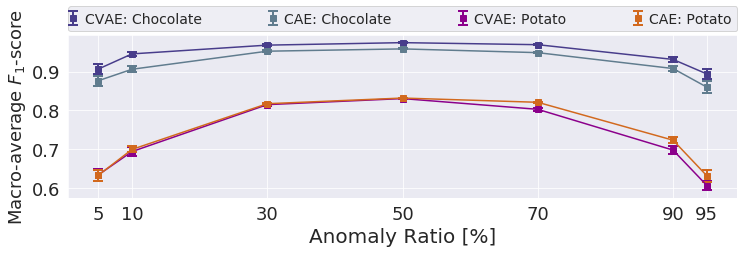

In [5]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

#fig, ax = plt.subplots(figsize=(6,5))
fig, ax = plt.subplots(figsize=(12,3))

N = (5, 10, 30, 50, 70, 90, 95)
ax.errorbar(N, VAE_KITKAT_AR_mean, VAE_KITKAT_AR_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#483D8B', ecolor='#483D8B', label="CVAE: Chocolate")
ax.errorbar(N, AE_KITKAT_AR_mean, AE_KITKAT_AR_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#607c8e', ecolor='#607c8e', label="CAE: Chocolate")

ax.errorbar(N, VAE_POTATO_AR_mean, VAE_POTATO_AR_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#8B008B', ecolor='#8B008B', label="CVAE: Potato")
ax.errorbar(N, AE_POTATO_AR_mean, AE_KITKAT_AR_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#D2691E', ecolor='#D2691E', label="CAE: Potato")


ticks = [5, 10, 30, 50, 70, 90, 95]
#ax.set_xscale('log', basex=20)
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)

#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
#plt.title('Anomaly Ratios', fontsize=22, pad=40)
ax.set_ylabel(r'Macro-average $F_1$-score',fontsize=18)
ax.set_xlabel('Anomaly Ratio [%]',fontsize=20)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

if (save_plots):
    plt.savefig(f"compare_anomalyratio.png", dpi=300, bbox_inches='tight')
plt.show()

## Plot Precisions

In [6]:
""" load data from their folders """

# VAE: Kitkat
VAE_KITKAT_PPV_mean = np.load(f'{DIR_VAE_kitkat}/PPV_mean.npy')
VAE_KITKAT_PPV_err  = np.load(f'{DIR_VAE_kitkat}/PPV_err.npy')

# VAE: Potato
VAE_POTATO_PPV_mean = np.load(f'{DIR_VAE_potato}/PPV_mean.npy')
VAE_POTATO_PPV_err  = np.load(f'{DIR_VAE_potato}/PPV_err.npy')

# AE: Kitkat
AE_KITKAT_PPV_mean = np.load(f'{DIR_AE_kitkat}/PPV_mean.npy')
AE_KITKAT_PPV_err  = np.load(f'{DIR_AE_kitkat}/PPV_err.npy')

# AE: Potato
AE_POTATO_PPV_mean = np.load(f'{DIR_AE_potato}/PPV_mean.npy')
AE_POTATO_PPV_err  = np.load(f'{DIR_AE_potato}/PPV_err.npy')

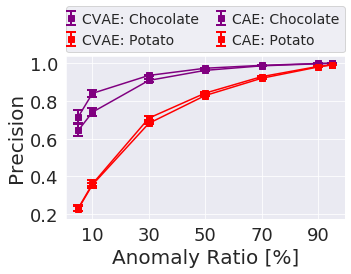

In [7]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

fig, ax = plt.subplots(figsize=(5,3))
#fig, ax = plt.subplots(figsize=(12,3))

N = (5, 10, 30, 50, 70, 90, 95)

ax.errorbar(N, VAE_KITKAT_PPV_mean, VAE_KITKAT_PPV_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, 
            capthick=2, markersize=6, color='purple', ecolor='purple', label="CVAE: Chocolate")

ax.errorbar(N, VAE_POTATO_PPV_mean, VAE_POTATO_PPV_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, 
            capthick=2, markersize=6, color='red', ecolor='red', label="CVAE: Potato")

ax.errorbar(N, AE_KITKAT_PPV_mean, AE_KITKAT_PPV_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, 
            capthick=2, markersize=6, color='purple', ecolor='purple', label="CAE: Chocolate")

ax.errorbar(N, AE_POTATO_PPV_mean, AE_POTATO_PPV_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, 
            capthick=2, markersize=6, color='red', ecolor='red', label="CAE: Potato")

#ax.set_xscale('log', basex=2)
#ticks = [5, 10, 30, 50, 70, 90, 95]
ticks = [10, 30, 50, 70, 90]
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)

#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
#plt.title('Anomaly Ratios', fontsize=22, pad=40)
ax.set_ylabel('Precision',fontsize=20)
ax.set_xlabel('Anomaly Ratio [%]',fontsize=20)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=2,
               numpoints=1, fontsize=14) 
plt.show()

## Plot Sensitivity

https://reader.elsevier.com/reader/sd/pii/S1319157818305822?token=B747DC0C12F6225AC92B24B099BA3A5BA70127721662D42438EBE0E54DDDAC7619E5F3E741F9AC2775DA65DA1387165D&originRegion=eu-west-1&originCreation=20210429133442

In [8]:
""" load data from their folders """

# VAE: Kitkat
VAE_KITKAT_TPR_mean = np.load(f'{DIR_VAE_kitkat}/TPR_mean.npy') * 100
VAE_KITKAT_TPR_err  = np.load(f'{DIR_VAE_kitkat}/TPR_err.npy') * 100

# VAE: Potato
VAE_POTATO_TPR_mean = np.load(f'{DIR_VAE_potato}/TPR_mean.npy') * 100
VAE_POTATO_TPR_err  = np.load(f'{DIR_VAE_potato}/TPR_err.npy') * 100

# AE: Kitkat
AE_KITKAT_TPR_mean = np.load(f'{DIR_AE_kitkat}/TPR_mean.npy') * 100
AE_KITKAT_TPR_err  = np.load(f'{DIR_AE_kitkat}/TPR_err.npy') * 100

# AE: Potato
AE_POTATO_TPR_mean = np.load(f'{DIR_AE_potato}/TPR_mean.npy') * 100
AE_POTATO_TPR_err  = np.load(f'{DIR_AE_potato}/TPR_err.npy') * 100

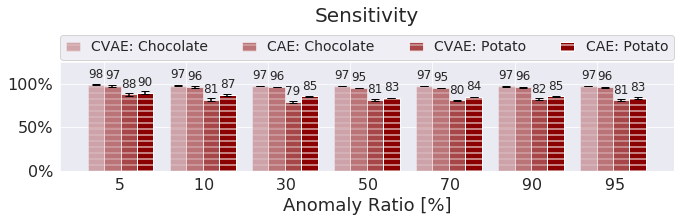

In [9]:
"""
========
Barchart
========
A bar plot with errorbars and height labels on individual bars
Source: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
"""
mpl.rcParams['legend.handlelength'] = 1
sns.set_style("darkgrid")
LARGE_FONT  = 20
MEDIUM_FONT = 18
SMALL_FONT  = 16

N = 7
ind = np.arange(N)  # the x locations for the groups
width0 = -0.2
width = 0.2       # the width of the bars
width2 = 0.4       # the width of the bars
width3 = 0.6       # the width of the bars

fig, ax = plt.subplots(figsize=(11,2))

rects1 = ax.bar(ind, VAE_KITKAT_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=0.3, 
                yerr=VAE_KITKAT_TPR_err, linewidth=1, capsize=4, label='CVAE: Chocolate')

rects2 = ax.bar(ind + width, AE_KITKAT_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=0.5, 
                yerr=AE_KITKAT_TPR_err, linewidth=1, capsize=4, label='CAE: Chocolate')

rects3 = ax.bar(ind + width2, VAE_POTATO_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=0.7, 
                yerr=VAE_POTATO_TPR_err, linewidth=1, capsize=4, label='CVAE: Potato')

rects4 = ax.bar(ind + width3, AE_POTATO_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=1.0, 
                yerr=AE_POTATO_TPR_err, linewidth=1, capsize=4, label='CAE: Potato')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# add some text for labels, title and axes ticks
ax.set_xlabel('Anomaly Ratio [%]',fontsize=18)
ax.set_title('Sensitivity', fontsize=LARGE_FONT, pad=40)
ax.set_xticks([]) 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('      5','       10','       30','       50','       70','       90','       95'), fontsize=MEDIUM_FONT)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FONT)
ax.set_ylim([0, 125])

y_value=['{:.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

plt.show()

## Plot Specifity

In [10]:
""" load data from their folders """

# VAE: Kitkat
VAE_KITKAT_TNR_mean = np.load(f'{DIR_VAE_kitkat}/TNR_mean.npy') * 100
VAE_KITKAT_TNR_err  = np.load(f'{DIR_VAE_kitkat}/TNR_err.npy') * 100

# VAE: Potato
VAE_POTATO_TNR_mean = np.load(f'{DIR_VAE_potato}/TNR_mean.npy') * 100
VAE_POTATO_TNR_err  = np.load(f'{DIR_VAE_potato}/TNR_err.npy') * 100

# AE: Kitkat
AE_KITKAT_TNR_mean = np.load(f'{DIR_AE_kitkat}/TNR_mean.npy') * 100
AE_KITKAT_TNR_err  = np.load(f'{DIR_AE_kitkat}/TNR_err.npy') * 100

# AE: Potato
AE_POTATO_TNR_mean = np.load(f'{DIR_AE_potato}/TNR_mean.npy') * 100
AE_POTATO_TNR_err  = np.load(f'{DIR_AE_potato}/TNR_err.npy') * 100

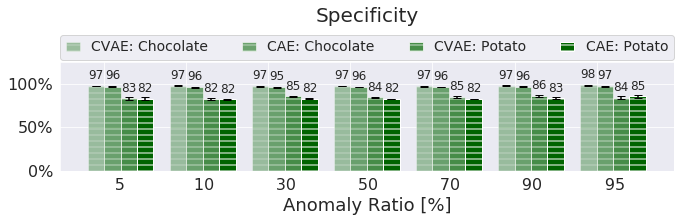

In [11]:
"""
========
Barchart
========
A bar plot with errorbars and height labels on individual bars
Source: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
"""
mpl.rcParams['legend.handlelength'] = 1
sns.set_style("darkgrid")
LARGE_FONT  = 20
MEDIUM_FONT = 18
SMALL_FONT  = 16

N = 7
ind = np.arange(N)  # the x locations for the groups
width0 = -0.2
width = 0.2       # the width of the bars
width2 = 0.4       # the width of the bars
width3 = 0.6       # the width of the bars

fig, ax = plt.subplots(figsize=(11,2))

rects1 = ax.bar(ind, VAE_KITKAT_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=0.35, 
                yerr=VAE_KITKAT_TNR_err, linewidth=1, capsize=4, label='CVAE: Chocolate')

rects2 = ax.bar(ind + width, AE_KITKAT_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=0.55, 
                yerr=AE_KITKAT_TNR_err, linewidth=1, capsize=4, label='CAE: Chocolate')

rects3 = ax.bar(ind + width2, VAE_POTATO_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=0.7, 
                yerr=VAE_POTATO_TNR_err, linewidth=1, capsize=4, label='CVAE: Potato')

rects4 = ax.bar(ind + width3, AE_POTATO_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=1.0, 
                yerr=AE_POTATO_TNR_err, linewidth=1, capsize=4, label='CAE: Potato')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# add some text for labels, title and axes ticks
ax.set_xlabel('Anomaly Ratio [%]',fontsize=18)
ax.set_title('Specificity', fontsize=LARGE_FONT, pad=40)
ax.set_xticks([]) 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('      5','       10','       30','       50','       70','       90','       95'), fontsize=MEDIUM_FONT)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FONT)
ax.set_ylim([0, 125])

y_value=['{:.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

plt.show()

## Chocolate

In [12]:
""" load data from their folders """
# recall/sensitivity
VAE_KITKAT_TPR_mean = np.load(f'{DIR_VAE_kitkat}/TPR_mean.npy') * 100
VAE_KITKAT_TPR_err  = np.load(f'{DIR_VAE_kitkat}/TPR_err.npy') * 100

AE_KITKAT_TPR_mean = np.load(f'{DIR_AE_kitkat}/TPR_mean.npy') * 100
AE_KITKAT_TPR_err  = np.load(f'{DIR_AE_kitkat}/TPR_err.npy') * 100

# specificity
VAE_KITKAT_TNR_mean = np.load(f'{DIR_VAE_kitkat}/TNR_mean.npy') * 100
VAE_KITKAT_TNR_err  = np.load(f'{DIR_VAE_kitkat}/TNR_err.npy') * 100

AE_KITKAT_TNR_mean = np.load(f'{DIR_AE_kitkat}/TNR_mean.npy') * 100
AE_KITKAT_TNR_err  = np.load(f'{DIR_AE_kitkat}/TNR_err.npy') * 100

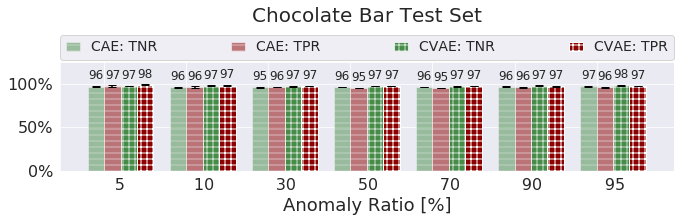

In [13]:
"""
========
Barchart
========
A bar plot with errorbars and height labels on individual bars
Source: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
"""
mpl.rcParams['legend.handlelength'] = 1
sns.set_style("darkgrid")
LARGE_FONT  = 20
MEDIUM_FONT = 18
SMALL_FONT  = 16

N = 7
ind = np.arange(N)  # the x locations for the groups
width0 = -0.2
width = 0.2       # the width of the bars
width2 = 0.4       # the width of the bars
width3 = 0.6       # the width of the bars

fig, ax = plt.subplots(figsize=(11,2))

rects1 = ax.bar(ind, AE_KITKAT_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=0.35, 
                yerr=AE_KITKAT_TNR_err, linewidth=1, capsize=4, label='CAE: TNR')

rects2 = ax.bar(ind + width, AE_KITKAT_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=0.5, 
                yerr=AE_KITKAT_TPR_err, linewidth=1, capsize=4, label='CAE: TPR')

rects3 = ax.bar(ind + width2, VAE_KITKAT_TNR_mean, width0, align="center", color='darkgreen', hatch=r"-||-", alpha=0.7, 
                yerr=VAE_KITKAT_TNR_err, linewidth=1, capsize=4, label='CVAE: TNR')

rects4 = ax.bar(ind + width3, VAE_KITKAT_TPR_mean, width0, align="center", color='darkred', hatch=r"-||-", alpha=1.0, 
                yerr=VAE_KITKAT_TPR_err, linewidth=1, capsize=4, label='CVAE: TPR')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# add some text for labels, title and axes ticks
ax.set_xlabel('Anomaly Ratio [%]',fontsize=18)
ax.set_title('Chocolate Bar Test Set', fontsize=LARGE_FONT, pad=40)
ax.set_xticks([]) 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('      5','       10','       30','       50','       70','       90','       95'), fontsize=MEDIUM_FONT)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FONT)
ax.set_ylim([0, 125])

y_value=['{:.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

#save_plots=True
if (save_plots):
    plt.savefig(f"compare_ratios_kitkat.png", dpi=300, bbox_inches='tight')
plt.show()

## Potato

In [14]:
""" load data from their folders """

# recall/sensitivity
VAE_POTATO_TPR_mean = np.load(f'{DIR_VAE_potato}/TPR_mean.npy') * 100
VAE_POTATO_TPR_err  = np.load(f'{DIR_VAE_potato}/TPR_err.npy') * 100

AE_POTATO_TPR_mean = np.load(f'{DIR_AE_potato}/TPR_mean.npy') * 100
AE_POTATO_TPR_err  = np.load(f'{DIR_AE_potato}/TPR_err.npy') * 100

# specificity
VAE_POTATO_TNR_mean = np.load(f'{DIR_VAE_potato}/TNR_mean.npy') * 100
VAE_POTATO_TNR_err  = np.load(f'{DIR_VAE_potato}/TNR_err.npy') * 100

AE_POTATO_TNR_mean = np.load(f'{DIR_AE_potato}/TNR_mean.npy') * 100
AE_POTATO_TNR_err  = np.load(f'{DIR_AE_potato}/TNR_err.npy') * 100

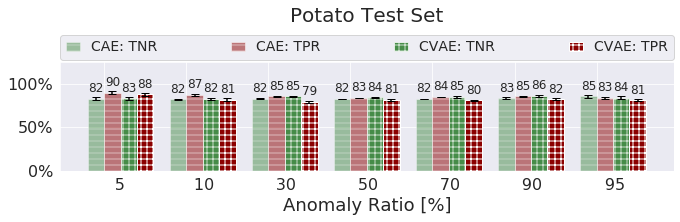

In [15]:
"""
========
Barchart
========
A bar plot with errorbars and height labels on individual bars
Source: https://stackoverflow.com/questions/30228069/how-to-display-the-value-of-the-bar-on-each-bar-with-pyplot-barh
"""
mpl.rcParams['legend.handlelength'] = 1
sns.set_style("darkgrid")
LARGE_FONT  = 20
MEDIUM_FONT = 18
SMALL_FONT  = 16

N = 7
ind = np.arange(N)  # the x locations for the groups
width0 = -0.2
width = 0.2       # the width of the bars
width2 = 0.4       # the width of the bars
width3 = 0.6       # the width of the bars

fig, ax = plt.subplots(figsize=(11,2))

rects1 = ax.bar(ind, AE_POTATO_TNR_mean, width0, align="center", color='darkgreen', hatch=r"--", alpha=0.35, 
                yerr=AE_POTATO_TNR_err, linewidth=1, capsize=4, label='CAE: TNR')

rects2 = ax.bar(ind + width, AE_POTATO_TPR_mean, width0, align="center", color='darkred', hatch=r"--", alpha=0.5, 
                yerr=AE_POTATO_TPR_err, linewidth=1, capsize=4, label='CAE: TPR')

rects3 = ax.bar(ind + width2, VAE_POTATO_TNR_mean, width0, align="center", color='darkgreen', hatch=r"-||-", alpha=0.7, 
                yerr=VAE_POTATO_TNR_err, linewidth=1, capsize=4, label='CVAE: TNR')

rects4 = ax.bar(ind + width3, VAE_POTATO_TPR_mean, width0, align="center", color='darkred', hatch=r"-||-", alpha=1.0, 
                yerr=VAE_POTATO_TPR_err, linewidth=1, capsize=4, label='CVAE: TPR')


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize=12)
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

# add some text for labels, title and axes ticks
ax.set_xlabel('Anomaly Ratio [%]',fontsize=18)
ax.set_title('Potato Test Set', fontsize=LARGE_FONT, pad=40)
ax.set_xticks([]) 
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('      5','       10','       30','       50','       70','       90','       95'), fontsize=MEDIUM_FONT)
plt.tick_params(axis='both', which='major', labelsize=SMALL_FONT)
ax.set_ylim([0, 125])

y_value=['{:.0f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=4,
               numpoints=1, fontsize=14) 

#save_plots=True
if (save_plots):
    plt.savefig(f"compare_ratios_potato.png", dpi=300, bbox_inches='tight')
plt.show()